# Insurance Charges based on Sex

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [8]:
#This is a dataset I found from kaggle showing people's health insurance charges.
#1338 people
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Average insurance charges based on sex')

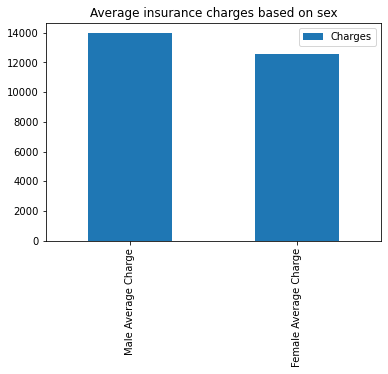

In [11]:
#Feel like I can optimize this much easier
#Changing charges value from a float to integer, looks cleaner
insurance['charges'] = insurance['charges'].astype("int")
#dataframe seperated between males and females
women = insurance.loc[insurance['sex'] == 'female']
male = insurance.loc[insurance['sex'] == 'male']
#Finding the average charges
women_average = women['charges'].mean()
male_average = male['charges'].mean()
#Making it into dataframes instead of a list to plot
df1 = pd.DataFrame(male_average, index = ['Male Average Charge'], columns = ['Charges'])
df2 = pd.DataFrame(women_average, index = ['Female Average Charge'], columns = ['Charges'])
result = [df1, df2]
df = pd.concat(result)
#Graphing
df.plot.bar()
plt.title('Average insurance charges based on sex')

# Insurance charges based on region

Text(0, 0.5, 'Charges')

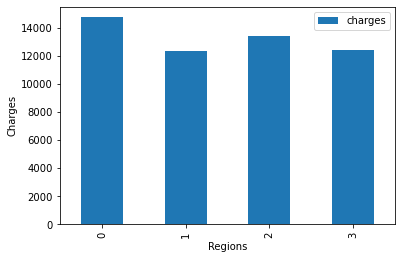

In [17]:
#Charges based on which region location?
#Average charge for southeast, southwest, northeast, northwest
regions = insurance.groupby("region")
#Splitting the dataframe
north_east = regions.get_group('northeast')
north_west = regions.get_group('northwest')
south_east = regions.get_group('southeast')
south_west = regions.get_group('southwest')
#Finding average chages for each 
se_average = south_east['charges'].mean()
sw_average = south_west['charges'].mean()
ne_average = north_east['charges'].mean()
nw_average = north_west['charges'].mean()

#Making it into a dataframe
area = [se_average, sw_average, ne_average, nw_average]
df4 = pd.DataFrame(area, columns = ['charges'])
df4.plot.bar()

plt.xlabel('Regions')
plt.ylabel('Charges')

# Insurance Charges based on how many children 

Text(0.5, 0, 'Charges')

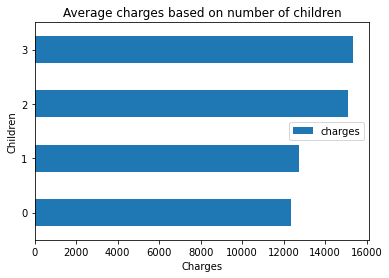

In [6]:
#Grouping by Children
children = insurance.groupby('children')

#Seperation
zero = children.get_group(0)
one = children.get_group(1)
two = children.get_group(2)
three = children.get_group(3)

#Finding averages
zero_average = zero['charges'].mean()
one_average = one['charges'].mean()
two_average = two['charges'].mean()
three_average = three['charges'].mean()

#Start Graphs
array = [zero_average, one_average, two_average, three_average]
df3 = pd.DataFrame(array, columns = ['charges'])
df3.plot.barh()

plt.title('Average charges based on number of children')
plt.ylabel('Children')
plt.xlabel('Charges')
#Can see fewer children correlate to having cheaper insurance


# Charges based on ages

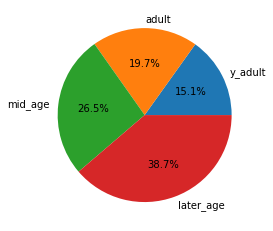

In [52]:
#The ages are between 18-64
#Find a way to visualize this
test = insurance['age']
max_value = test.min()  #this is what i used to check the min and max values of age column
#print(max_value)
#Splitting the dataframe between different age groups and then finding average
y_adult = insurance.loc[(insurance['age'] >= 18) & (insurance['age'] <= 25)]
adult = insurance.loc[(insurance['age'] >= 26) & (insurance['age'] <= 44)]
mid_age = insurance.loc[(insurance['age'] >= 45) & (insurance['age'] <= 59)]
later_age = insurance.loc[(insurance['age'] >=64)]  
scope = ['y_adult', 'adult', 'mid_age', 'later_age']
#Get average of each varaible
y_adult_avg = y_adult['charges'].mean()
adult_avg = adult['charges'].mean()
mid_age_avg = mid_age['charges'].mean()
later_age_avg = later_age['charges'].mean()

#Start Graphing
df_avg = [y_adult_avg, adult_avg, mid_age_avg, later_age_avg]
plt.pie(df_avg, labels = scope, autopct = '%.1f%%')

plt.show()
#From this, we can see that as you get older, health insurance increases

#NOTE
#I am not showing the average charges based on if they are a smoker or not due to the wide variance in the dataset I have. 
#There's 1000 non smokers and around 330 smokers so the numbers would not align.

# Insurance charges based on multiple Conditions

In [9]:
#Now, let's say we want the average charge of young adults who have zero children and based in the northwest region. 

insurance_filter = insurance[(insurance['age'] >= 18) & (insurance['age'] <=24) & (insurance['children'] == 0) & 
                            (insurance['region'] == 'northwest')]
#For these conditions, I only found there to be 42 matches
insurance_filter_avg = insurance_filter['charges'].mean()



8207.952380952382